# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [4]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
# Check the default storage location of scikit-learn

from sklearn.datasets.base import get_data_home
print (get_data_home())

/Users/plodium2000/scikit_learn_data


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [5]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
# mnist = fetch_mldata('mnist-original', data_home='~/datasets/')

mnist = fetch_mldata("MNIST Original")
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.

# Reference on Numpy: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html
# np.arrange(X.shape[0]) is to shuffle elements. If x is an array, make a copy and shuffle the elements randomly.

shuffle = np.random.permutation(np.arange(X.shape[0]))

X, Y = X[shuffle], Y[shuffle]


print('Data shape: ', X.shape)
print('Label shape:', Y.shape)


# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
print("Test Data Size: ", len(test_data))

dev_data, dev_labels = X[60000:61000], Y[60000:61000]
print("Dev Data Size: ", len(dev_data))

train_data, train_labels = X[:60000], Y[:60000]
print("Training Data Size: ", len(train_data))

mini_train_data, mini_train_labels = X[:1000], Y[:1000]
print("Mini Train Data Size: ", len(mini_train_data))


Data shape:  (70000, 784)
Label shape: (70000,)
Test Data Size:  9000
Dev Data Size:  1000
Training Data Size:  60000
Mini Train Data Size:  1000


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

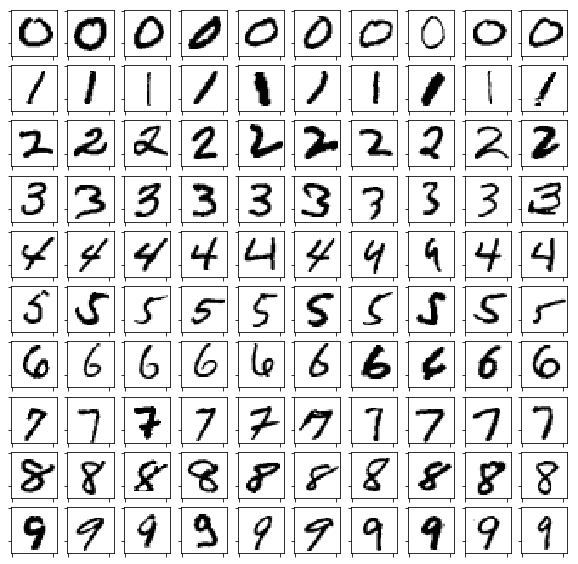

In [7]:
### STUDENT START ###

def P1(num_examples=10):
    
    # Set the tick color of the x and y axes
    plt.rc('xtick', color='black')
    plt.rc('ytick', color='black')
    
    # Set the size of the display
    plt.rcParams['figure.figsize'] = 10, 10
    
    # Calculate the pixel size (finding square root of the number of features)
    pixel = int(np.sqrt(X.shape[1]))

    # Loop through the number starting from 0 to 9
    i=0
    
    while i<=9:    
        
        # Set digit_samples array that contains the first 10 samples (from the shuffled Y) of digit "i"
        digit_samples=X[Y==i][0:num_examples]
        
        # Loop through the number of examples as given by the parameter "num_examples"
        j=0
        
        while j<num_examples:

            # subplot the intended index in the the structure of the 10 x num_examples
            plot_display=plt.subplot(10, num_examples, int(i*num_examples)+int(j+1))
            
            # remove tick labels from the display
            plot_display.axes.xaxis.set_ticklabels([])
            plot_display.axes.yaxis.set_ticklabels([])
                                    
            # reshape the digit_samples j into 2x2 display (pixel x pixel)
            plot_number=np.reshape(digit_samples[j],(pixel,pixel))
            
            # display the digit in binary color.
            plt.imshow(plot_number,cmap = 'binary')
            
            # increment to the next example of the digit
            j+=1
        
        # increment to the next digit
        i+=1
    
### STUDENT END ###

# Call the function
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [8]:
### STUDENT START ###

def P2(k_values):
    
    for i in k_values:
        print("K={0}".format(i))
        
        # See reference at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
        k_neighbor=KNeighborsClassifier(n_neighbors=i)
        
        # Fit the model with the mini train data
        k_neighbor.fit(mini_train_data,mini_train_labels)
        
        # Print the accuracy of the dev set.
        print(classification_report(k_neighbor.predict(dev_data),dev_labels))


### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)


### Answer: based on the outcome of K=1, it appears that digit 5 
### is the most difficult digit given its lowest F1-score which reflects 
### the balance between precision and recall. While it doesn't have the worst precision, 
### its recall weighs down its F1-score.

K=1
             precision    recall  f1-score   support

        0.0       0.98      0.91      0.94       107
        1.0       1.00      0.89      0.94       118
        2.0       0.79      0.99      0.88        82
        3.0       0.87      0.77      0.82        97
        4.0       0.82      0.89      0.85        96
        5.0       0.84      0.93      0.88        82
        6.0       0.96      0.94      0.95       100
        7.0       0.92      0.89      0.90       117
        8.0       0.88      0.94      0.91        89
        9.0       0.82      0.78      0.80       112

avg / total       0.89      0.89      0.89      1000

K=3
             precision    recall  f1-score   support

        0.0       1.00      0.90      0.95       110
        1.0       1.00      0.81      0.89       130
        2.0       0.81      0.95      0.88        87
        3.0       0.84      0.69      0.75       105
        4.0       0.85      0.88      0.86       100
        5.0       0.79      0.94  

ANSWER:

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [9]:
### STUDENT START ###
def P3(train_sizes, accuracies):
    
    for i in train_sizes:
        
        new_train_data, new_train_labels = train_data.copy(), train_labels.copy()
        shuffle = np.random.permutation(np.arange(new_train_data.shape[0]))
        new_train_data, new_train_labels = new_train_data[shuffle], new_train_labels[shuffle]
        new_train_data, new_train_labels = new_train_data[:i], new_train_labels[:i]

        # See reference at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
        k_neighbor=KNeighborsClassifier(n_neighbors=1)   
    
        # Fit the model with the subset of shuffled train data
        k_neighbor.fit(new_train_data,new_train_labels)
        
        # Capture the time
        t = time.time()
        
        # Predicted digits
        predicted_digits = k_neighbor.predict(dev_data)
        
        # Calculate time for prediction
        time_taken = time.time() - t
        
        # Calculate accuracy
        accuracies.append(np.mean(predicted_digits==dev_labels))
        
        # Report
        print("Training size, ", i, ". Accuracy", accuracies[-1], ". Time taken", time_taken)


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training size,  100 . Accuracy 0.697 . Time taken 0.09894394874572754
Training size,  200 . Accuracy 0.785 . Time taken 0.20277905464172363
Training size,  400 . Accuracy 0.828 . Time taken 0.40875697135925293
Training size,  800 . Accuracy 0.86 . Time taken 0.8724842071533203
Training size,  1600 . Accuracy 0.903 . Time taken 1.7285549640655518
Training size,  3200 . Accuracy 0.928 . Time taken 3.377774953842163
Training size,  6400 . Accuracy 0.944 . Time taken 8.177446842193604
Training size,  12800 . Accuracy 0.954 . Time taken 16.030012845993042
Training size,  25000 . Accuracy 0.973 . Time taken 30.7849600315094


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [10]:
#def P4():

### STUDENT START ###

def P4():

    new_train_data, new_train_labels = train_data.copy(), train_labels.copy()
    shuffle = np.random.permutation(np.arange(new_train_data.shape[0]))
    new_train_data, new_train_labels = new_train_data[shuffle], new_train_labels[shuffle]

    # Use Linear Regression to fit the model
    linear_predictor=LinearRegression()   

    # Fit the model with the mini train data
    linear_predictor.fit(new_train_data,new_train_labels)

    # Predicted digits
    predicted_digits = linear_predictor.predict(dev_data)

    # Calculate accuracy
    accuracy = np.mean(predicted_digits==dev_labels)

    # Report
    print("Accuracy", accuracy)
    print("First 10 samples of the predicted digits ", predicted_digits[:10])
    
### STUDENT END ###

P4()

Accuracy 0.0
First 10 samples of the predicted digits  [4.92036567 2.12163941 4.73156969 4.04068874 4.97586215 3.10151281
 4.43643175 4.46261302 2.77379256 3.76077455]


ANSWER: The accuracy is 0. The first 10 samples of the predicted values show floating numbers, given the nature of the linear regression model itself which predicts values based on coefficients calculated from the training data set.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

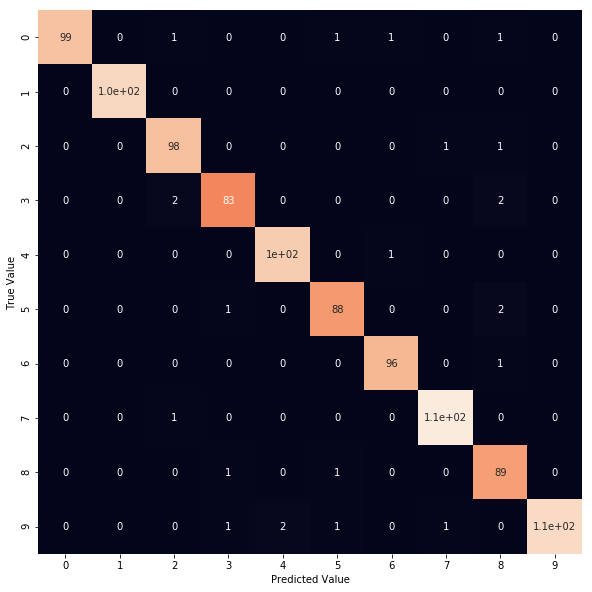

In [11]:
# import seaborn for visualization of a confusion matrix
import seaborn as sns

def P5():

### STUDENT START ###

    # See reference at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    k_neighbor=KNeighborsClassifier(n_neighbors=1)   

    # Fit the model using train data of 60,000
    k_neighbor.fit(train_data,train_labels)

    # Predicted digits
    predicted_digits = k_neighbor.predict(dev_data)

    # Set a confusion matrix
    confusion_matrix_map = confusion_matrix(predicted_digits,dev_labels) 

    sns.heatmap(confusion_matrix_map, square=True, annot=True, cbar=False)
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    

P5()

ANSWER: The most confused pair is numer 9 as it has relatively higher number of false negative (e.g., those in the lower left) and false positive (those in the upper right).

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [36]:
# Create a fuction to blur each of the digit data

def gaussian_blur(data):
    
    #   Calculate Gaussian Kernel
    #   Reference: Gaussian Blur of 3 x 3 https://en.wikipedia.org/wiki/Kernel_(image_processing)
    kernel_weight= [[(1/16),(2/16),(1/16)],[(2/16),(4/16),(2/16)],[(1/16),(2/16),(1/16)]]

    # kernel_weight= [[0.000229,0.005977,0.060598],[0.241732,-0.382928,0.241732],[0.060598,0.005977,0.000229]]
    
    # calculate size of the 2D digit features

    feature_length = len(data)
    pixel = int(np.sqrt(feature_length))
    
    print(pixel)
    
    # reshape the data into 2 dimensional array
    blurred_data = np.reshape(data, (pixel,pixel))
    
    # keep the original copy in 2 dimensional array
    data = np.reshape(data, (pixel,pixel))
    
    # Blur the data only those pixels that have complete 8 surrounding pixels.
    # That said, the first/last rows and first/last columns in the 2D space won't be blurred
    
    x=1
    y=1
    last = pixel-1
    
    while x < last:        
        while y < last:
            
            # initialize the value of the pixel
            blurred_data[x][y] = 0
            x_axes = x-1
            for i in range(0,3):
                y_axes = y-1
                for j in range(0,3):
                    blurred_data[x][y]+=data[x_axes][y_axes]*kernel_weight[i][j]
                    y_axes+=1
                x_axes+=1 
            y+=1
        x+=1
        

    # reshape the blurred data back into 1 dimensional array
    blurred_data = np.reshape(blurred_data,(1,feature_length))
    
    print(blurred_data[0])
    
    return blurred_data[0]

In [30]:
from scipy.ndimage import gaussian_filter

def P6(input_data, input_labels):
    
### STUDENT START ###

    processed_data, processed_labels = input_data.copy(), input_labels.copy()
    
    data_size = len(processed_data)
    data_features = processed_data.shape[1]

    i=0
    
    while i < data_size: 
        processed_data[i] = gaussian_filter(processed_data[i], sigma = 5)
        i+=1
                   
    return processed_data, processed_labels
    

### preprocess the training data but not the dev data

processed_train_data, processed_train_labels = P6(train_data, train_labels)

# Use KNeighbor to fit the model
k_neighbor_new_training=KNeighborsClassifier(n_neighbors=1)      

# Fit the model with the pre-processed train data
k_neighbor_new_training.fit(processed_train_data,processed_train_labels)

# Predicted digits
predicted_digits_a = k_neighbor_new_training.predict(dev_data)

# Calculate accuracy
accuracy_a = np.mean(predicted_digits_a==dev_labels)

# Report
print("Accuracy when preprocessing only the training data: ", accuracy_a)


### preprocess the dev data but not the training data
processed_dev_data, processed_dev_labels = P6(dev_data, dev_labels)

# Use KNeighbor to fit the model
k_neighbor_b=KNeighborsClassifier(n_neighbors=1)      

# Fit the model with the original training data data
k_neighbor_b.fit(train_data.copy(),train_labels)

# Predicted digits
predicted_digits_b = k_neighbor_b.predict(processed_dev_data)

# Calculate accuracy
accuracy_b = np.mean(predicted_digits_b==processed_dev_labels)

# Report
print("Accuracy when preprocessing only the dev data", accuracy_b)

### preprocess both training and dev data

# Predicted digits
predicted_digits_c = k_neighbor_new_training.predict(processed_dev_data)

# Calculate accuracy
accuracy_c = np.mean(predicted_digits_c==processed_dev_labels)

# Report
print("Accuracy when preprocessing both the training and dev data", accuracy_c)

Accuracy when preprocessing only the training data:  0.977
Accuracy when preprocessing only the dev data 0.977
Accuracy when preprocessing both the training and dev data 0.977


In [46]:
from scipy.ndimage import gaussian_filter

def P6(input_data, input_labels):
    
### STUDENT START ###

    processed_data, processed_labels = input_data.copy(), input_labels.copy()
    
    data_size = len(processed_data)
    data_features = processed_data.shape[1]

    i=0
    
    while i < data_size: 
        processed_data[i] = gaussian_filter(processed_data[i], sigma = 50)
        i+=1
                   
    return processed_data, processed_labels


### preprocess the training data but not the dev data

processed_mini_train_data, processed_mini_train_labels = P6(mini_train_data, mini_train_labels)

# Use KNeighbor to fit the model
clf=KNeighborsClassifier(n_neighbors=1)      

# Fit the model with the pre-processed train data
clf.fit(processed_mini_train_data,mini_train_labels)

# Predicted digits
predicted_clf = clf.predict(dev_data)

# Calculate accuracy
accuracy_clf = np.mean(predicted_clf==dev_labels)

# Report
print("Accuracy when preprocessing only the training data: ", accuracy_clf)

Accuracy when preprocessing only the training data:  0.623


In [29]:
print('Train data shape: ', processed_train_data.shape)
print('Dev data shape: ', processed_dev_data.shape)
print(sum(predicted_digits_b))
print(sum(predicted_digits_a))
print(sum(predicted_digits_c))
print(processed_dev_data)

Train data shape:  (60000, 784)
Dev data shape:  (1000, 784)
4526.0
4526.0
4526.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [11]:
#def P7():

### STUDENT START ###

def P7():
    
    # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
    # Map the pixel values to either 0 or 1 using the threshold of 0.5
    bernoulli_model=BernoulliNB(binarize=0.5)
    
    # Fit a Naive Bayes classifier with the train data set, and report accuracy on the dev data
    bernoulli_model.fit(train_data,train_labels)
    print("Accuracy level with the Binomial classifier ", np.mean(bernoulli_model.predict(dev_data)==dev_labels))
   
    ## NNext try mapping the pixel values to 0, 1, or 2, representing white, grey, or black.
    
    # First make a copy of both the training and dev data sets
    new_train_data = train_data.copy()   
    new_dev_data = dev_data.copy()
    

    # Then replace the pixel values with the simplified thresholod of  1/3, and 2/3.
          
    new_train_data[new_train_data<=1/3]=0
    new_train_data[np.logical_and(new_train_data>1/3,new_train_data<=2/3)]=1
    new_train_data[new_train_data>2/3]=2
          
    new_dev_data[new_dev_data<=1/3]=0
    new_dev_data[np.logical_and(new_dev_data>1/3,new_dev_data<=2/3)]=1
    new_dev_data[new_dev_data>2/3]=2
          
    # initiate a Multinomial classifier      
    multinomial_model=MultinomialNB()
   
    # fit the multinomial model and report accuracy on the dev data
    multinomial_model.fit(new_train_data,train_labels)       
    print("Accuracy level with the Multinomial classifier ", np.mean(multinomial_model.predict(new_dev_data)==dev_labels))

    
### STUDENT END ###

P7()

Accuracy level with the Binomial classifier  0.845
Accuracy level with the Multinomial classifier  0.823


ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
### STUDENT START ###

def P8(alphas):

    # initialize a Bernoulli model
    # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
    bernoulli_for_search=BernoulliNB()
    
    
    # Reference: https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.GridSearchCV.html
    grid_search=GridSearchCV(bernoulli_for_search, alphas,scoring='accuracy')
    grid_search.fit(mini_train_data,mini_train_labels)
    #sc.predict(dev_data)
    return grid_search
    ### STUDENT END ###

alphas = {'alpha': [ 0,0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

# Print results for grid_search
# Reference: https://datascience.stackexchange.com/questions/21877/how-to-use-the-output-of-gridsearch

print(nb.best_params_)
print(nb.best_estimator_)
print(nb.grid_scores_)

### STUDENT END ###


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


{'alpha': 0.1}
BernoulliNB(alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True)
[mean: 0.80300, std: 0.03072, params: {'alpha': 0}, mean: 0.82000, std: 0.02208, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.02305, params: {'alpha': 0.001}, mean: 0.82000, std: 0.02607, params: {'alpha': 0.01}, mean: 0.82100, std: 0.02454, params: {'alpha': 0.1}, mean: 0.81900, std: 0.02147, params: {'alpha': 0.5}, mean: 0.81200, std: 0.01814, params: {'alpha': 1.0}, mean: 0.81000, std: 0.01767, params: {'alpha': 2.0}, mean: 0.77500, std: 0.01719, params: {'alpha': 10.0}]


ANSWER: The best value for alpha is 0.1, which resulted in the accuracy of 0.82.
        The accuracy given alpha = 0 is 0.803.
        This is what I expected, as alpha=0 indicates no smoothing, so the accuracy level is likely to be less.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [13]:
def P9():

### STUDENT END ###

    # initialize a GuassianNB model
    # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
    gaussian_model=GaussianNB()
    
    # Fit the model with the train data
    gaussian_model.fit(train_data, train_labels)
    
    return gaussian_model
    
### STUDENT END ###
gnb = P9()

# Rreport accuracy on the dev data
print("Accuracy level with the GaussianNB classifier ", np.mean(gnb.predict(dev_data)==dev_labels))


# Analysis of why the accuracy level is only 56.9%
# First produce the classification report to see the accuracy for each digit
print(classification_report(gnb.predict(dev_data),dev_labels))

# Then look at how mean and variance of each feature is like
# For each digit, calculate average of the features' mean
for i in range(0,10):
    print("Average of mean",i," is ", np.mean(gnb.theta_[i]))
    
# For each digit, calculate average of the features' variance
for i in range(0,10):
    print("Average of sigma ",i," is ", np.mean(gnb.sigma_[i]))
    
# For each digit, calculate normalized average of the features' mean
for i in range(0,10):
    print("Average of normalized mean ",i," is ", np.mean(gnb.theta_[i])/np.mean(gnb.sigma_[i]))

# This analysis is crude and only rough approximation, but revealed that
# the variance of pixel value is probably too low to be useful in
# the GaussianNB, given that the model assumes a Gaussian distribution
# for each feature.

# Reference: http://dataaspirant.com/2017/02/20/gaussian-naive-bayes-classifier-implementation-python/
# Reference: http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.naive_bayes.GaussianNB.html


Accuracy level with the GaussianNB classifier  0.571
             precision    recall  f1-score   support

        0.0       0.97      0.72      0.83       133
        1.0       0.94      0.83      0.88       119
        2.0       0.25      0.90      0.40        29
        3.0       0.42      0.77      0.54        47
        4.0       0.21      0.85      0.34        26
        5.0       0.02      0.40      0.04         5
        6.0       0.94      0.66      0.78       139
        7.0       0.27      0.79      0.41        39
        8.0       0.70      0.33      0.45       204
        9.0       0.94      0.39      0.55       259

avg / total       0.80      0.57      0.62      1000

Average of mean 0  is  0.1730870882472628
Average of mean 1  is  0.0761121813861528
Average of mean 2  is  0.1492344992014595
Average of mean 3  is  0.14191485924005948
Average of mean 4  is  0.12133126491480055
Average of mean 5  is  0.12909393150585005
Average of mean 6  is  0.1382391811892526
Average of 

ANSWER: The model accuracy is 0.571. The subsequent analysis, while crude and only rough approximation, revealed that the variance of pixel value is probably too low to be useful in the GaussianNB, given that the model assumes a Gaussian distribution for each feature.

Therefore to improve the model accuracy level, we may consider increasing the variance of the features. By increasing the variance by just about 2.5 times as approximated above, we could get the accuracy level up above 83%, as shown below.

In [14]:
# new instance for the model
gnb_new = P9()

# set variance to be about 2.5 times higher than before (~0.5 x 2.5 = 0.125)
gnb_new.sigma_[:,:]=0.125

# print the new accuracy level
print("Accuracy level with the GaussianNB classifier ", np.mean(gnb_new.predict(dev_data)==dev_labels))

# compare the similar analysis as the previous one.

for i in range(0,10):
    print("Average of mean",i," is ", np.mean(gnb_new.theta_[i]))
    
# For each digit, calculate average of the features' variance
for i in range(0,10):
    print("Average of sigma ",i," is ", np.mean(gnb_new.sigma_[i]))
    
# For each digit, calculate normalized average of the features' mean
for i in range(0,10):
    print("Average of normalized mean ",i," is ", np.mean(gnb_new.theta_[i])/np.mean(gnb_new.sigma_[i]))

Accuracy level with the GaussianNB classifier  0.807
Average of mean 0  is  0.1730870882472628
Average of mean 1  is  0.0761121813861528
Average of mean 2  is  0.1492344992014595
Average of mean 3  is  0.14191485924005948
Average of mean 4  is  0.12133126491480055
Average of mean 5  is  0.12909393150585005
Average of mean 6  is  0.1382391811892526
Average of mean 7  is  0.1146144062710381
Average of mean 8  is  0.15052877587522723
Average of mean 9  is  0.12295877228613446
Average of sigma  0  is  0.125
Average of sigma  1  is  0.125
Average of sigma  2  is  0.125
Average of sigma  3  is  0.125
Average of sigma  4  is  0.125
Average of sigma  5  is  0.125
Average of sigma  6  is  0.125
Average of sigma  7  is  0.125
Average of sigma  8  is  0.125
Average of sigma  9  is  0.125
Average of normalized mean  0  is  1.3846967059781023
Average of normalized mean  1  is  0.6088974510892224
Average of normalized mean  2  is  1.193875993611676
Average of normalized mean  3  is  1.13531887392047

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [15]:
def display_digit(num_examples, classifier):
        
    ### Start plotting random examples
    # Set the tick color of the x and y axes
    plt.rc('xtick', color='black')
    plt.rc('ytick', color='black')
    
    # Set the size of the display
    plt.rcParams['figure.figsize'] = 30, 30
    
    # Calculate the pixel size (finding square root of the number of features)
    pixel = int(np.sqrt(X.shape[1]))

    # Loop through the number starting from 0 to 9
    i=0
    
    while i<=9:
        
        # Loop through the number of samples as given by the parameter "num_examples"
        j=0

        while j<num_examples:
            
            # initialize a new array to hold the digit's features
            pixels_generator = [0] * X.shape[1]
        
            # loop through each feature to define pixel value
            # also referencing: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
            for k in range(0, X.shape[1]):
                
                # For each pixel value, extract implied prob and add random noise (with max = 0.5)
                threshold_determiner = np.exp(classifier.feature_log_prob_[i][k])+np.random.rand()/2
                if threshold_determiner > 0.5:
                    pixels_generator[k] = 1

            # subplot the intended index in the the structure of the 10 x num_examples
            plot_display_bernoulli=plt.subplot(10, num_examples, int(i*num_examples)+int(j+1))

            # remove tick labels from the display
            plot_display_bernoulli.axes.xaxis.set_ticklabels([])
            plot_display_bernoulli.axes.yaxis.set_ticklabels([])

            # reshape the digit_samples j into 2x2 display (pixel x pixel)
            plot_number_bernoulli=np.reshape(pixels_generator,(pixel,pixel))

            # display the digit in binary color.
            plt.imshow(plot_number_bernoulli,cmap = 'binary')

            # increment to the next example of the digit
            j+=1

        # increment to the next digit
        i+=1

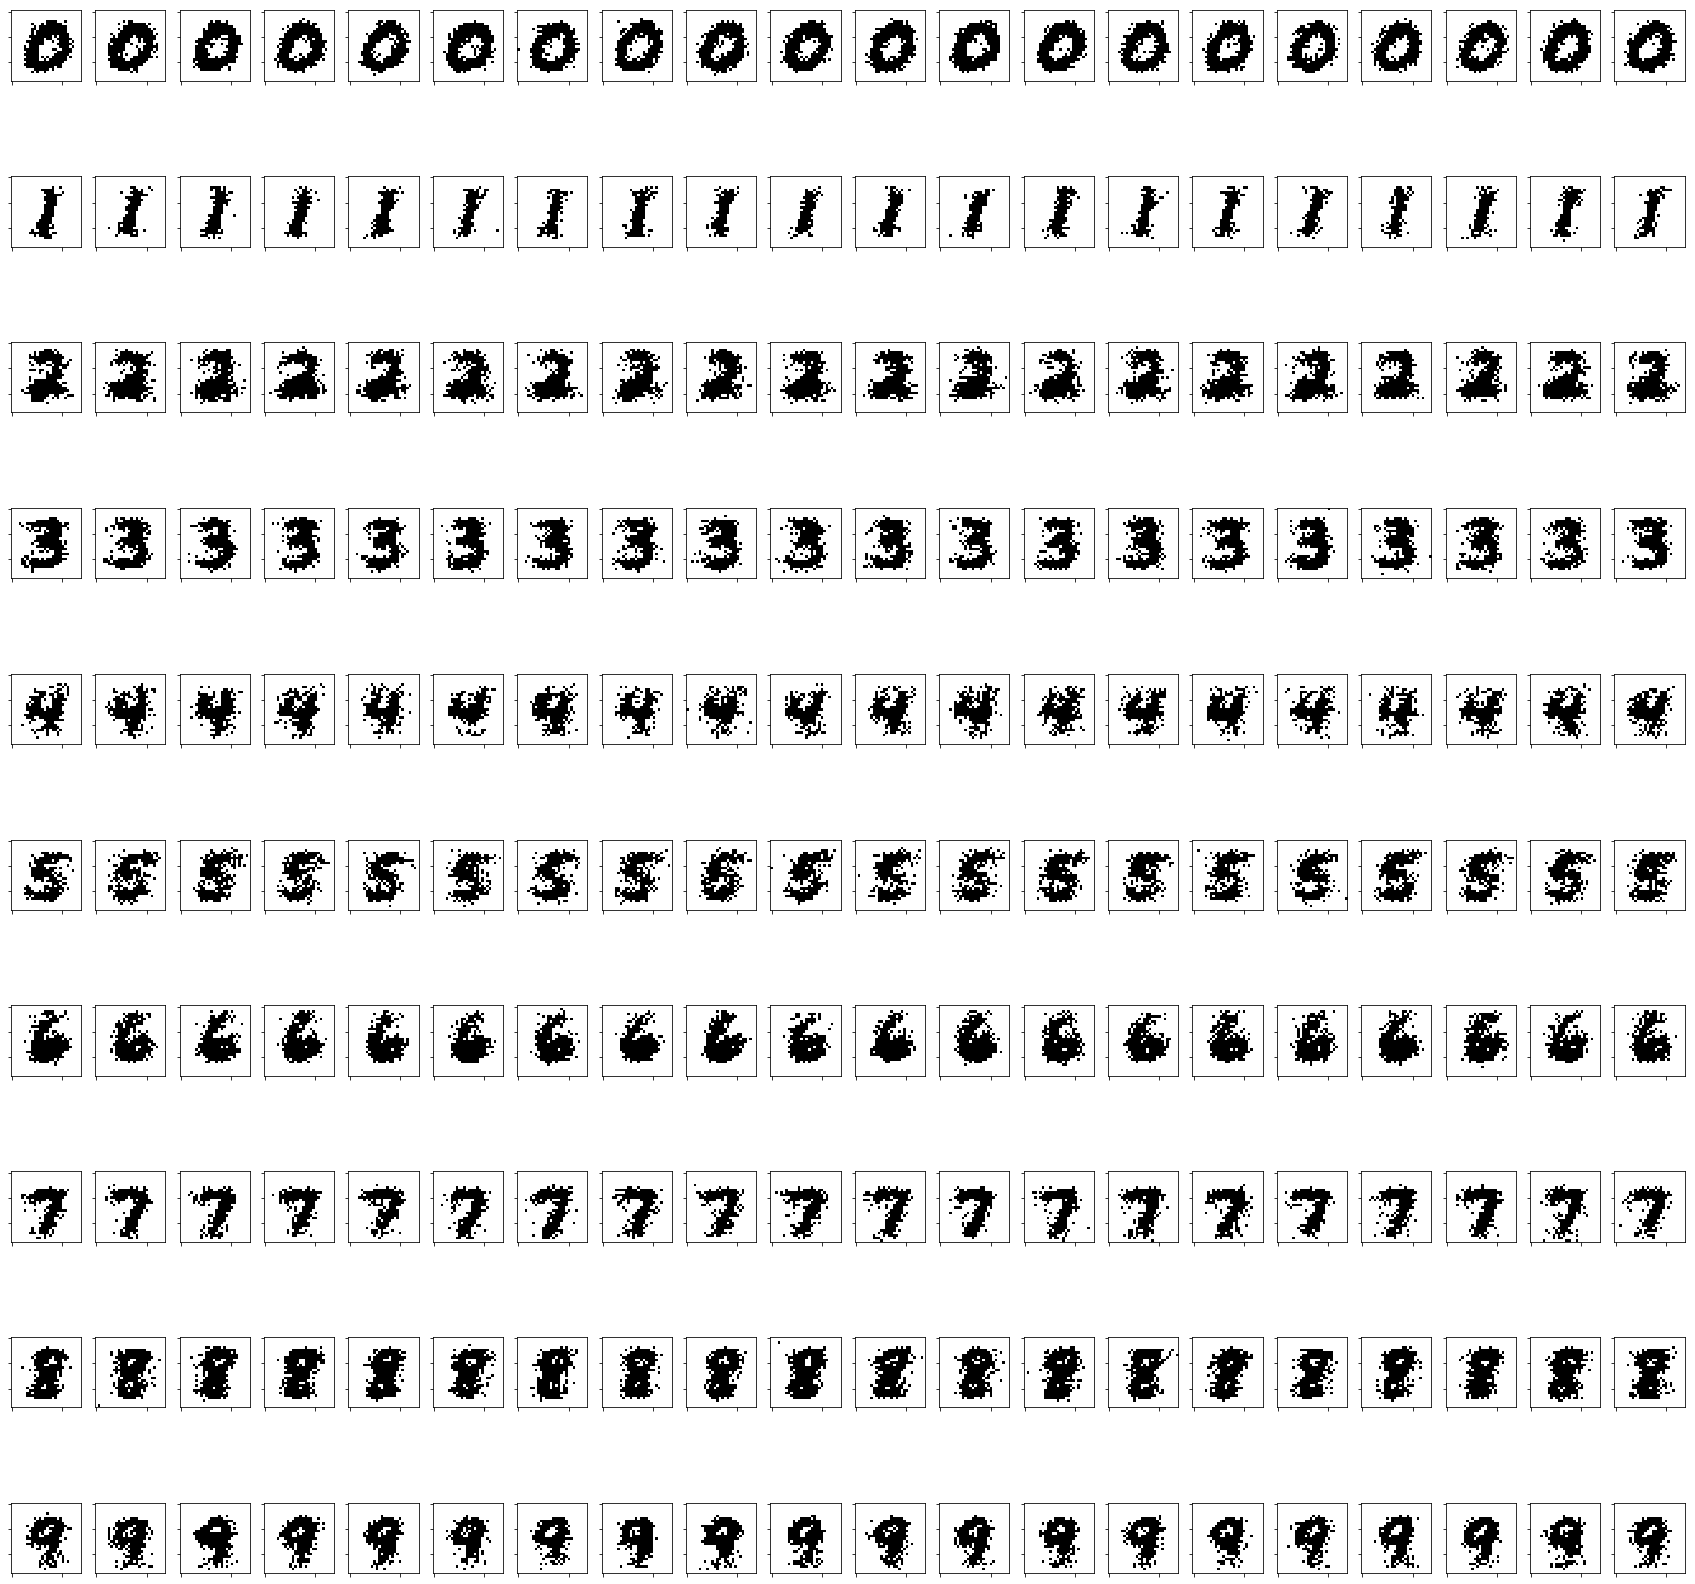

In [16]:
### STUDENT START ###

def P10(num_examples):
    
    # Create a new bernoulli classifier and
    # map the pixel values to either 0 or 1 using the threshold of 0.5
    bernoulli_classifier=BernoulliNB(binarize=0.5)
    
    # Fit the model with the train data
    bernoulli_classifier.fit(train_data,train_labels)
    
    display_digit(num_examples, bernoulli_classifier)

### STUDENT END ###

P10(20)

ANSWER: The generated digits look more uniform than those in the train data as shown in P1. This is due to the nature of the uniform random distribution of each pixel, and the fact that only one set of estimated probabities is retrieved for each class from the attribute "feature_log_prob_".

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [17]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # First make a copy of both the training and dev data sets
    binary_train_data = train_data.copy()   
    binary_dev_data = dev_data.copy()
    

    # Then replace the pixel values with the simplified thresholod of 0.5.
    binary_train_data[binary_train_data<0.5]=0
    binary_train_data[binary_train_data>0.5]=1
    
    binary_dev_data[binary_dev_data<0.5]=0
    binary_dev_data[binary_dev_data>0.5]=1

    index = 0
    
    for i in buckets:
            
        # initialize a Bernoulli model
        # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
        bernoulliNB_model=BernoulliNB(alpha=i, binarize=0.5)

        # Reference: https://scikit-learn.org/0.16/modules/generated/sklearn.grid_search.GridSearchCV.html
        # bernoulliNB_model=GridSearchCV(bernoulliNB_model, buckets,scoring='accuracy')
        bernoulliNB_model.fit(binary_train_data,train_labels)
               
        # Predicted digits
        predicted_pixel_values = bernoulliNB_model.predict(binary_dev_data)
        correct[index]=np.sum(predicted_pixel_values==dev_labels)
        total[index]=len(dev_labels)
        index+=1
        

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print("p(pred) <= ", buckets[i], "    total = ", total[i], "accuracy = ", accuracy)

p(pred) <=  0.5     total =  1000 accuracy =  0.848
p(pred) <=  0.9     total =  1000 accuracy =  0.845
p(pred) <=  0.999     total =  1000 accuracy =  0.845
p(pred) <=  0.99999     total =  1000 accuracy =  0.845
p(pred) <=  0.9999999     total =  1000 accuracy =  0.845
p(pred) <=  0.999999999     total =  1000 accuracy =  0.845
p(pred) <=  0.99999999999     total =  1000 accuracy =  0.845
p(pred) <=  0.9999999999999     total =  1000 accuracy =  0.845
p(pred) <=  1.0     total =  1000 accuracy =  0.845


ANSWER: Not sure how to do this problem correctly...

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()